In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import glob

In [2]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [3]:
df = df[df['Country/Region'] == 'US']

In [4]:
df = df[df['Province/State'] != 'Diamond Princess']

In [5]:
df = df.groupby('Province/State').sum()

In [6]:
df

Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Province/State                                                                 
Adams, IN              39.8522  -77.2865        0        0        0        0   
Alabama                32.3182  -86.9023        0        0        0        0   
Alachua, FL            29.7938  -82.4944        0        0        0        0   
Alameda County, CA     37.6017 -121.7195        0        0        0        0   
Alaska                 61.3707 -152.4044        0        0        0        0   
...                        ...       ...      ...      ...      ...      ...   
Williamson County, TN  35.9179  -86.8622        0        0        0        0   
Wisconsin              44.2685  -89.6165        0        0        0        0   
Worcester, MA          42.4097  -71.8571        0        0        0        0   
Wyoming                42.7560 -107.3025        0        0        0        0   
Yolo County, CA        38.7646 -121.9018        0        0        0        0   

                       1/26/20  1/27/20  1/28/20  1/29/20  ...  3/4/20  \
Province/State                                             ...           
Adams, IN                    0        0        0        0  ...       0   
Alabama                      0        0        0        0  ...       0   
Alachua, FL                  0        0        0        0  ...       0   
Alameda County, CA           0        0        0        0  ...       1   
Alaska                       0        0        0        0  ...       0   
...                        ...      ...      ...      ...  ...     ...   
Williamson County, TN        0        0        0        0  ...       0   
Wisconsin                    0        0        0        0  ...       0   
Worcester, MA                0        0        0        0  ...       0   
Wyoming                      0        0        0        0  ...       0   
Yolo County, CA              0        0        0        0  ...       0   

                       3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  \
Province/State                                                           
Adams, IN                   0       0       0       0       0        0   
Alabama                     0       0       0       0       0        0   
Alachua, FL                 0       0       0       0       0        0   
Alameda County, CA          1       1       2       2       2        0   
Alaska                      0       0       0       0       0        0   
...                       ...     ...     ...     ...     ...      ...   
Williamson County, TN       1       1       1       1       1        0   
Wisconsin                   0       0       0       0       0        3   
Worcester, MA               0       0       0       0       0        0   
Wyoming                     0       0       0       0       0        0   
Yolo County, CA             0       1       1       1       1        0   

                       3/11/20  3/12/20  3/13/20  
Province/State                                    
Adams, IN                    0        0        0  
Alabama                      0        0        5  
Alachua, FL                  0        0        0  
Alameda County, CA           0        0        0  
Alaska                       0        0        1  
...                        ...      ...      ...  
Williamson County, TN        0        0        0  
Wisconsin                    6        8       19  
Worcester, MA                0        0        0  
Wyoming                      0        1        1  
Yolo County, CA              0        0        0  

[243 rows x 54 columns]

In [7]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long')

In [8]:
df.columns

Index(['Adams, IN', 'Alabama', 'Alachua, FL', 'Alameda County, CA', 'Alaska',
       'Anoka, MN', 'Arapahoe, CO', 'Arizona', 'Arkansas', 'Arlington, VA',
       ...
       'Wayne, MI', 'Weber, UT', 'West Virginia', 'Westchester County, NY',
       'Whatcom, WA', 'Williamson County, TN', 'Wisconsin', 'Worcester, MA',
       'Wyoming', 'Yolo County, CA'],
      dtype='object', name='Province/State', length=243)

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.index.name = 'Date'

In [11]:
today = df.iloc[-1]

In [32]:
condition = today[(today >= 25)].index

In [33]:
print(condition)

Index(['California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana',
       'Massachusetts', 'New Jersey', 'New York', 'Oregon', 'Pennsylvania',
       'Tennessee', 'Texas', 'Virginia', 'Washington'],
      dtype='object', name='Province/State')


In [34]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > 0]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 0 confirmed cases')

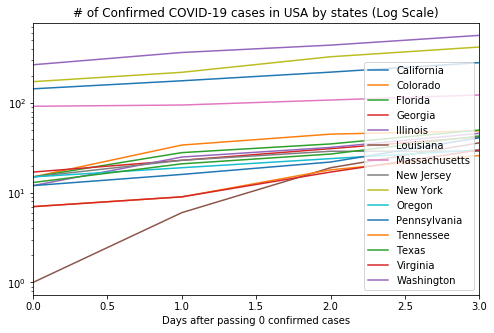

In [35]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in USA by states (Log Scale)")
axes.set_xlabel("Days after passing 0 confirmed cases")

Text(0.5, 0, 'Days after passing 0 confirmed cases')

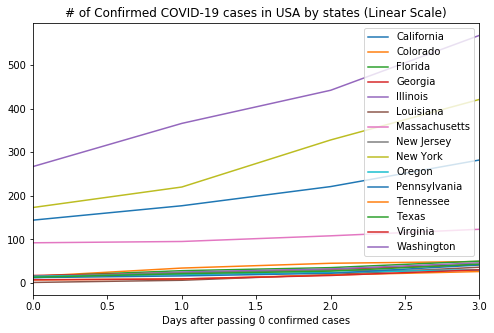

In [40]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in USA by states (Linear Scale)")
axes.set_xlabel("Days after passing 0 confirmed cases")

Text(0.5, 0, 'Dates')

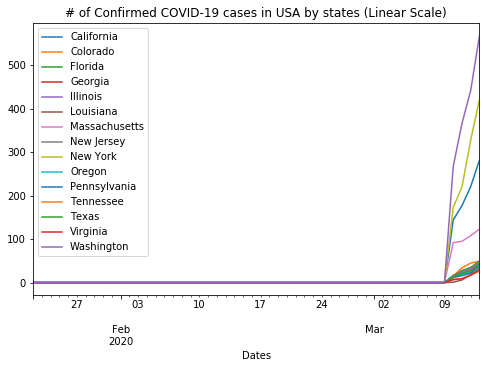

In [41]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in USA by states (Linear Scale)")
axes.set_xlabel("Dates")